In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


In [ ]:
#Set parameters to see all data
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [ ]:
# Read dataset

%%time
resort_file_path = 'H1.csv'

try:
    resort_hotel_df = pd.read_csv(resort_file_path)
except pd.errors.ParserError as e:
    print(f'Error while parsing CSV file: {e}')



resort_hotel_df.shape

CPU times: user 167 ms, sys: 12.7 ms, total: 180 ms
Wall time: 182 ms


(40060, 31)

In [ ]:
# Read dataset

%%time
city_file_path = 'H2.csv'

try:
    city_hotel_df = pd.read_csv(city_file_path)
except pd.errors.ParserError as e:
    print(f'Error while parsing CSV file: {e}')



city_hotel_df.shape

CPU times: user 326 ms, sys: 36.5 ms, total: 362 ms
Wall time: 362 ms


(79330, 31)

In [ ]:
resort_hotel_df['Hoteltype'] = 'resort'
city_hotel_df['Hoteltype'] = 'city'

In [ ]:
# Combineing dataframes
hotel_df = pd.concat([resort_hotel_df, city_hotel_df], ignore_index=True)
hotel_df.head(5).append(hotel_df.tail(5))

<ipython-input-34-858aa123546c>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hotel_df.head(5).append(hotel_df.tail(5))


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hoteltype
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,resort
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,resort
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,resort
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,resort
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03,resort
119385,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06,city
119386,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07,city
119387,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07,city
119388,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07,city
119389,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,151.20,0,2,Check-Out,2017-09-07,city


In [ ]:
# Method for reducing the memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
hotel_df = reduce_mem_usage(hotel_df)

Mem. usage decreased to 15.37 Mb (47.3% reduction)


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IsCanceled                   119390 non-null  int8   
 1   LeadTime                     119390 non-null  int16  
 2   ArrivalDateYear              119390 non-null  int16  
 3   ArrivalDateMonth             119390 non-null  object 
 4   ArrivalDateWeekNumber        119390 non-null  int8   
 5   ArrivalDateDayOfMonth        119390 non-null  int8   
 6   StaysInWeekendNights         119390 non-null  int8   
 7   StaysInWeekNights            119390 non-null  int8   
 8   Adults                       119390 non-null  int8   
 9   Children                     119386 non-null  float16
 10  Babies                       119390 non-null  int8   
 11  Meal                         119390 non-null  object 
 12  Country                      118902 non-null  object 
 13 

In [ ]:
hotel_df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hoteltype
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,resort


In [ ]:
hotel_df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType', 'BookingChanges', 'DepositType', 'Agent', 'Company', 'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate', 'Hoteltype'], dtype='object')

In [ ]:
cols_4_corr = ['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies',
               'Meal', 'Country', 'MarketSegment', 'DistributionChannel', 'IsRepeatedGuest',
               'PreviousCancellations', 'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
               'BookingChanges', 'DepositType', 'Agent', 'Company', 'DaysInWaitingList', 'CustomerType', 'ADR',
               'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'Hoteltype']
hotel_df[cols_4_corr].head()

,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,Hoteltype
0,342,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,resort
1,737,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,resort
2,7,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,resort
3,13,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,resort
4,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,resort


In [ ]:
label_encoder_cols = ['Meal',	'Country',	'MarketSegment',	'DistributionChannel',
                      'ReservedRoomType',	'AssignedRoomType', 'DepositType', 'CustomerType', 'Hoteltype']

In [ ]:
# Define a Laber Encoder Func.
def label_encode(data):

    # Initialize the label encoder
    label_encoder = LabelEncoder()

    # Fit and transform the data
    encoded_data = label_encoder.fit_transform(data)

    return encoded_data

In [ ]:
# Label encoding
corr_df = hotel_df.copy()
for col in label_encoder_cols:
  corr_df[col] = label_encode(corr_df[col])

In [ ]:
corr_df[cols_4_corr].head()

,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,Hoteltype
0,342,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,NULL,NULL,0,2,0.0,0,0,1
1,737,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,NULL,NULL,0,2,0.0,0,0,1
2,7,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,NULL,NULL,0,2,75.0,0,0,1
3,13,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304,NULL,0,2,75.0,0,0,1
4,14,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240,NULL,0,2,98.0,0,1,1


In [ ]:
# Calculating correlation
corr_df = corr_df[cols_4_corr].copy()

hotel_df_corr = corr_df[corr_df.columns.to_list()[:21] + corr_df.columns.to_list()[22:] + [corr_df.columns.to_list()[21]]]

corr = hotel_df_corr.corr()
cr = corr.copy()
top_corr_columns = []
#Determine best correlate columns over 0.1
top_corr_columns = cr.loc[:, 'ADR'][:-1]
best_accurate_columns = top_corr_columns[abs(top_corr_columns) > 0.1].sort_values(ascending=False)


len(best_accurate_columns)

<ipython-input-45-5489e2fcb999>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = hotel_df_corr.corr()


8

In [ ]:
best_accurate_columns.keys()

Index(['ReservedRoomType', 'Children', 'AssignedRoomType', 'MarketSegment', 'Adults', 'TotalOfSpecialRequests', 'Country', 'IsRepeatedGuest'], dtype='object')

<ipython-input-59-edef244c1943>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


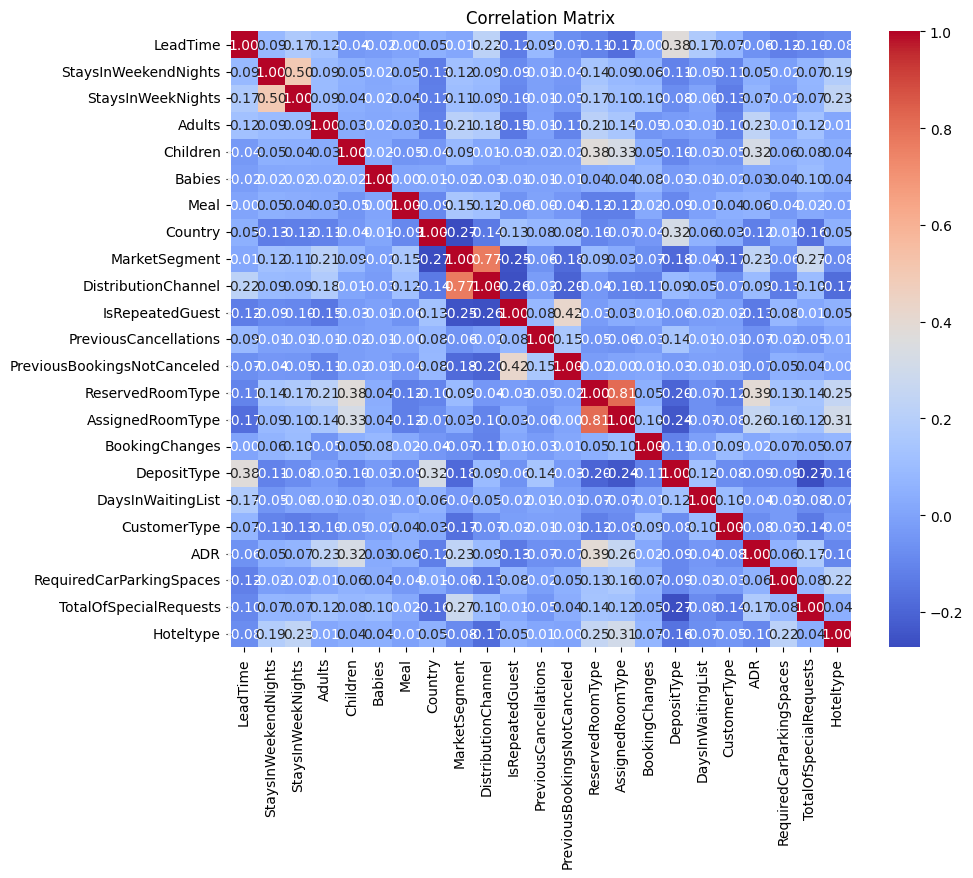

In [ ]:
# Calculate and visualize correlation matrix
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

plot_correlation_matrix(corr_df)


In [ ]:
#Merging date information as a date column
def merge_date_columns(df):

    # Convert 'arrival_date_month' to a numerical representation
    month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                     'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

    df['ArrivalDateMonth'] = df['ArrivalDateMonth'].map(month_mapping)

    # Create a new 'arrival_date' column by applying a lambda function
    df['arrivaldate'] = df.apply(lambda row: pd.to_datetime(f"{row['ArrivalDateYear']}-{row['ArrivalDateMonth']}-{row['ArrivalDateDayOfMonth']}",
                                                            errors='coerce'), axis=1)

    return df

In [ ]:
hotel_df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hoteltype
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,resort


In [ ]:
%%time
hotel_df = merge_date_columns(hotel_df)
drop_cols = ['ArrivalDateYear', 'ArrivalDateMonth',
             'ArrivalDateDayOfMonth']
hotel_df = hotel_df.drop(columns=drop_cols)
hotel_df.head()

CPU times: user 13.2 s, sys: 96.1 ms, total: 13.3 s
Wall time: 13.5 s


,IsCanceled,LeadTime,ArrivalDateWeekNumber,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hoteltype,arrivaldate
0,0,342,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort,2015-07-01
1,0,737,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,resort,2015-07-01
2,0,7,27,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort,2015-07-01
3,0,13,27,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,resort,2015-07-01
4,0,14,27,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,resort,2015-07-01


In [ ]:
# Display summary statistics of the DataFrame
print("\nSummary statistics of the DataFrame:")
print(hotel_df.describe())


Summary statistics of the DataFrame:
          IsCanceled       LeadTime  ArrivalDateWeekNumber  StaysInWeekendNights  StaysInWeekNights         Adults  Children         Babies  IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  BookingChanges  DaysInWaitingList            ADR  RequiredCarParkingSpaces  TotalOfSpecialRequests
count  119390.000000  119390.000000          119390.000000         119390.000000      119390.000000  119390.000000  119386.0  119390.000000    119390.000000          119390.000000                119390.000000   119390.000000      119390.000000  119390.000000             119390.000000           119390.000000
mean        0.370416     104.011416              27.165173              0.927599           2.500302       1.856403       0.0       0.007949         0.031912               0.087118                     0.137097        0.221124           2.321149            NaN                  0.062518                0.571363
std         0.482918     106.863097

In [ ]:
# Check for missing values in the DataFrame
print("\nMissing values in the DataFrame:")
print(hotel_df.isnull().sum())


Missing values in the DataFrame:
IsCanceled                       0
LeadTime                         0
ArrivalDateWeekNumber            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         4
Babies                           0
Meal                             0
Country                        488
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
Agent                            0
Company                          0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialRequests           0
ReservationStatus                0
ReservationStatusDate

In [ ]:
hotel_df = reduce_mem_usage(hotel_df)

Mem. usage decreased to 15.03 Mb (0.0% reduction)


In [ ]:
# Display unique values in each categorical column
print("\nUnique values in each categorical column:")
for col in hotel_df.select_dtypes(include='object').columns:
    print(f"{col}: {hotel_df[col].unique()}")


Unique values in each categorical column:
Meal: ['BB       ' 'FB       ' 'HB       ' 'SC       ' 'Undefined']
Country: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 

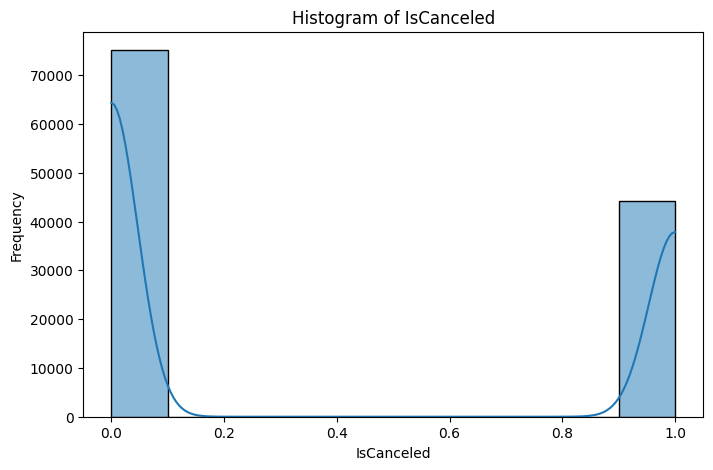

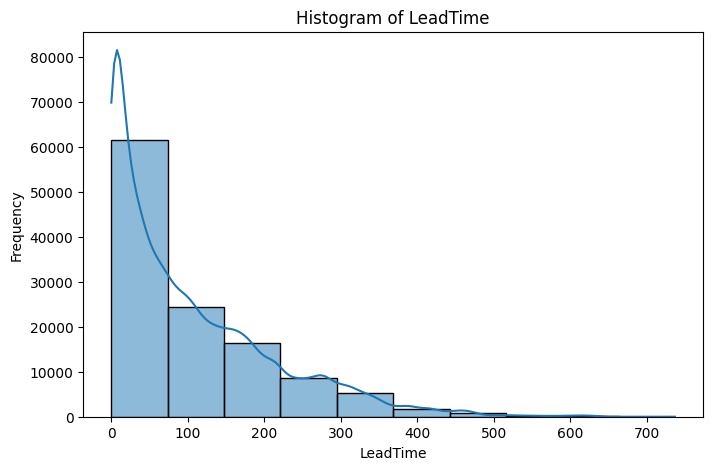

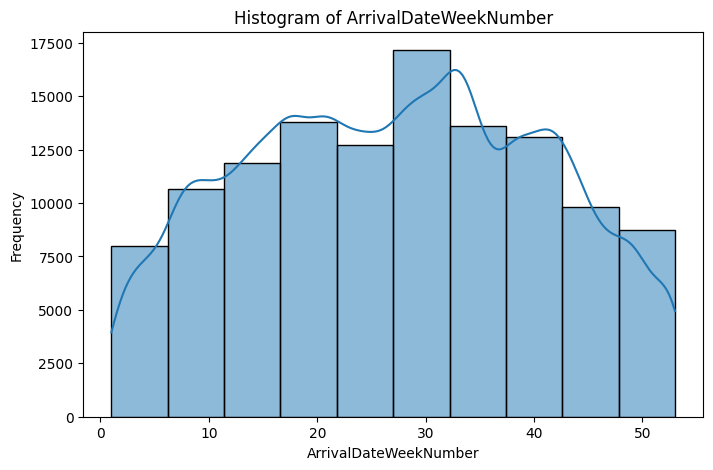

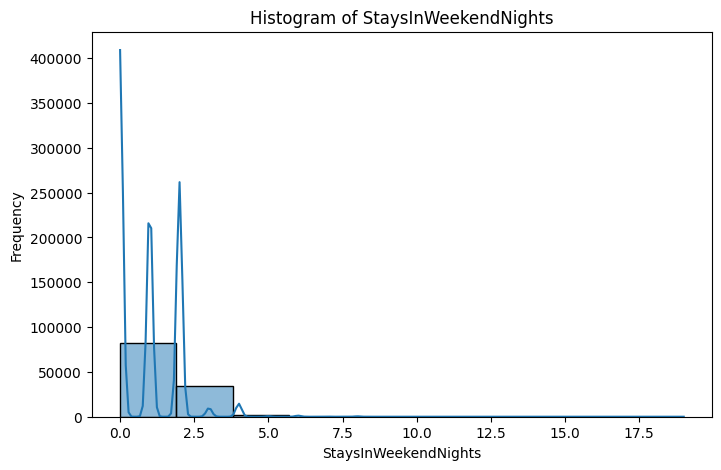

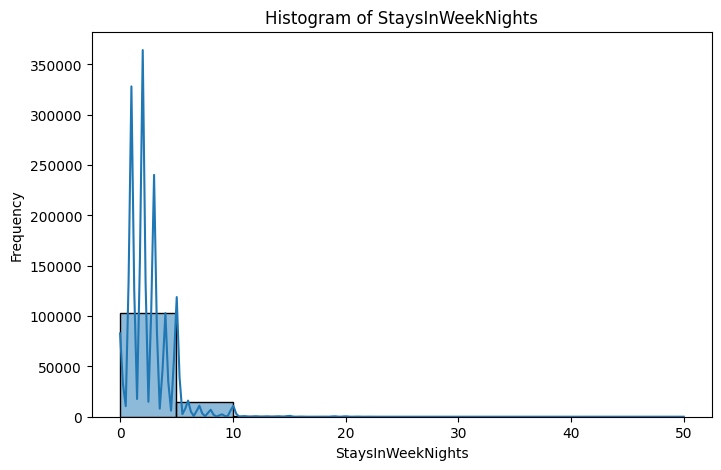

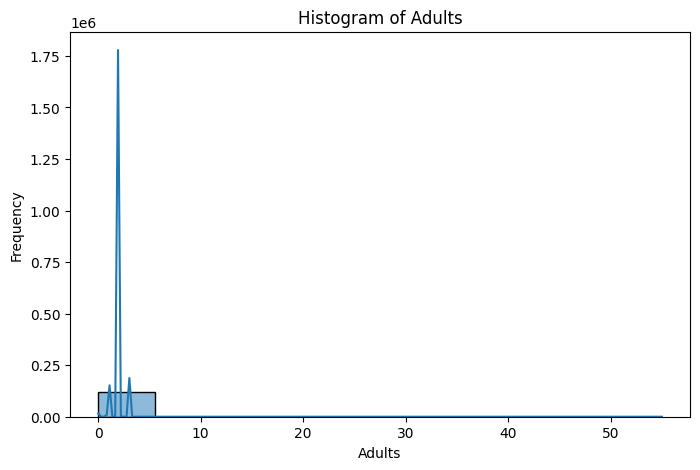

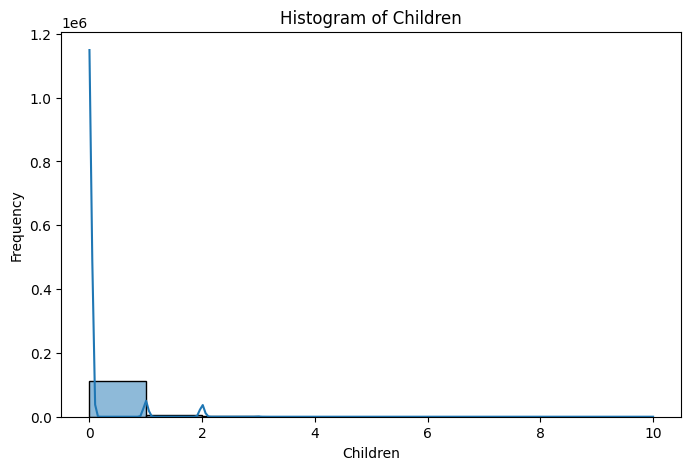

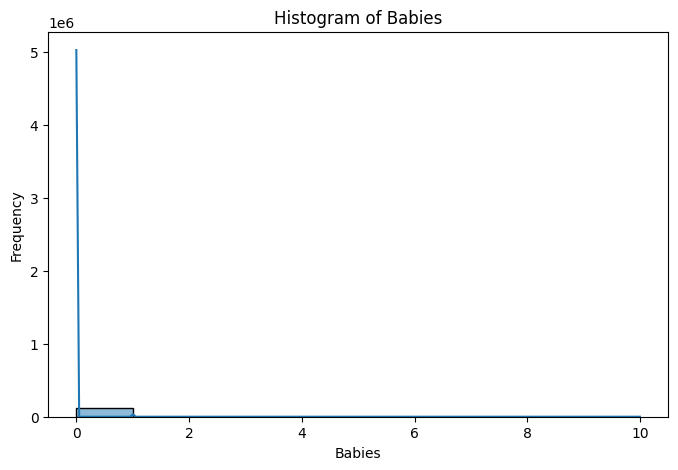

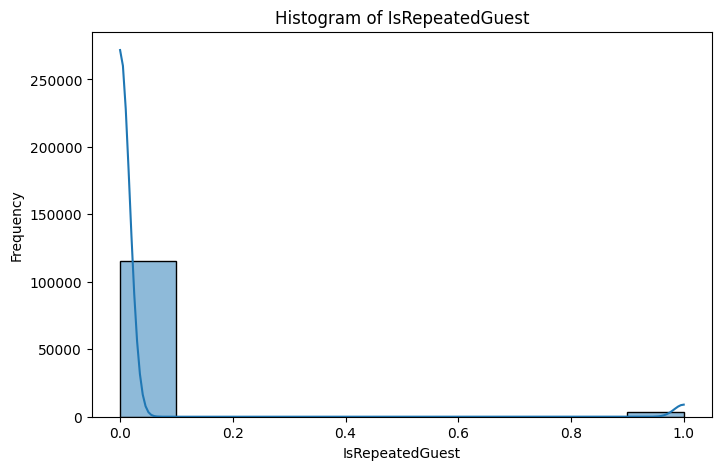

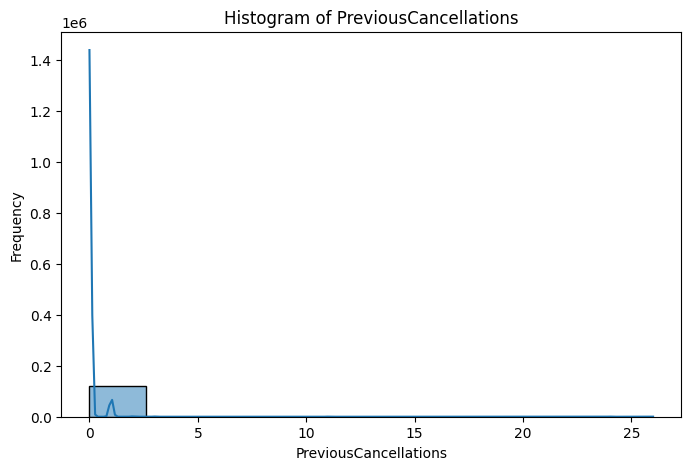

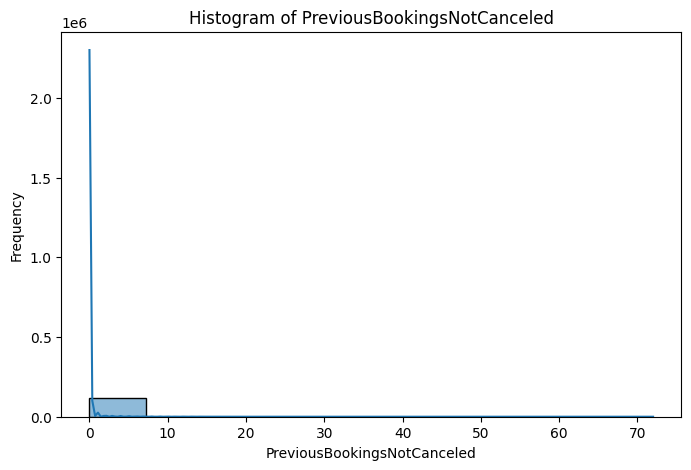

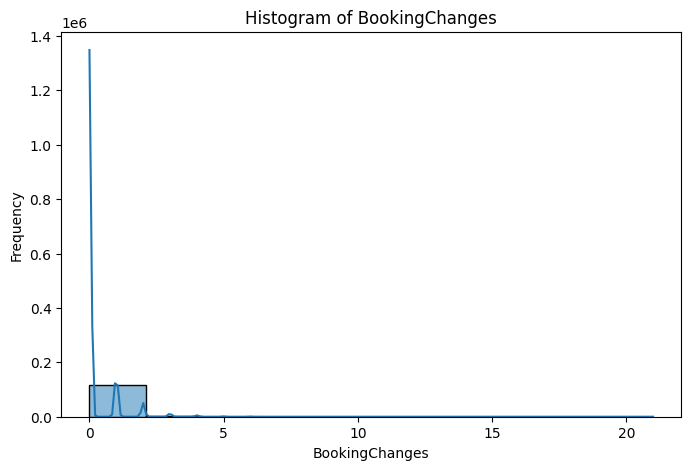

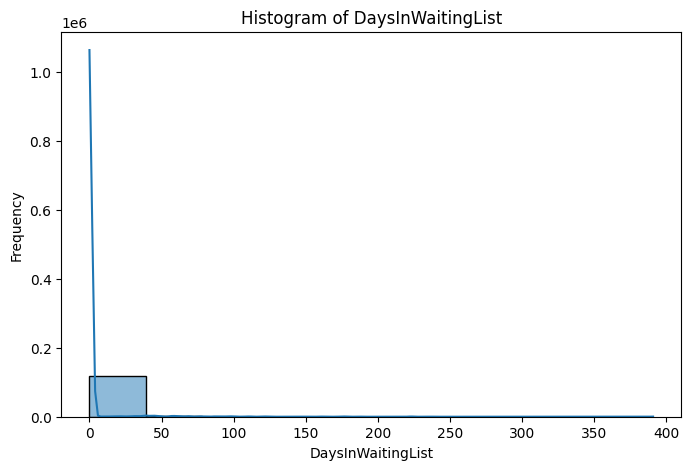

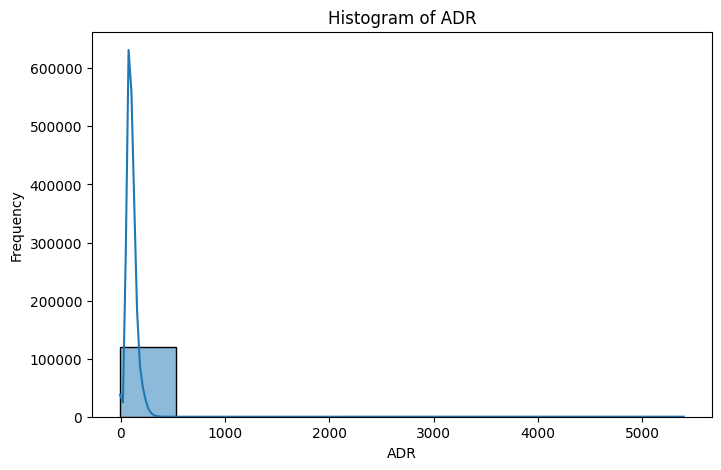

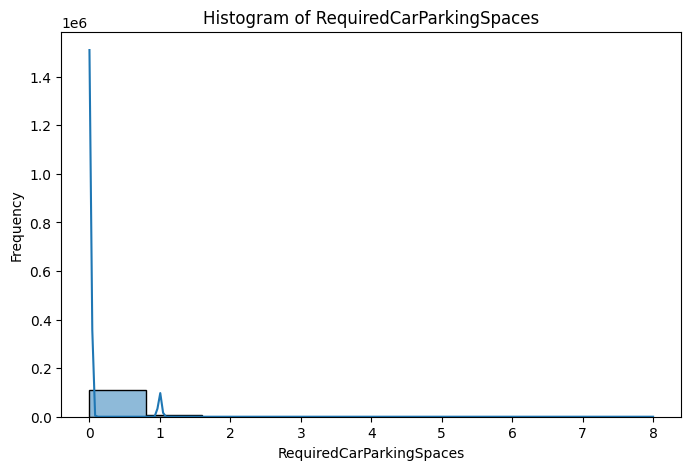

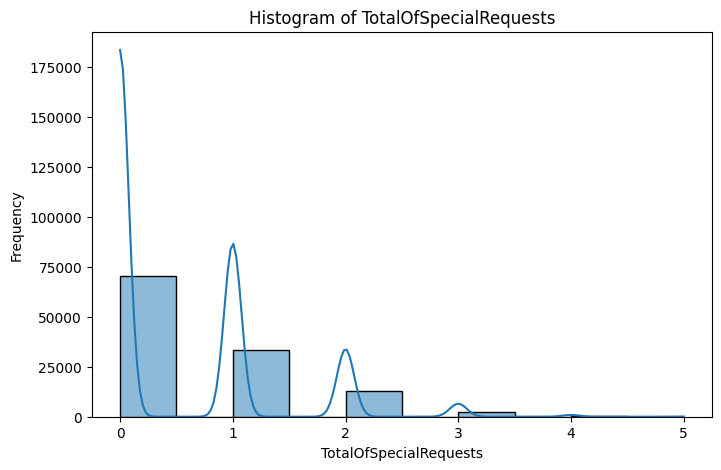

In [ ]:
# Plot histograms for each numerical column
def plot_histograms(df):
    for col in df.select_dtypes(include='number').columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], bins=10, kde=True)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

plot_histograms(hotel_df)

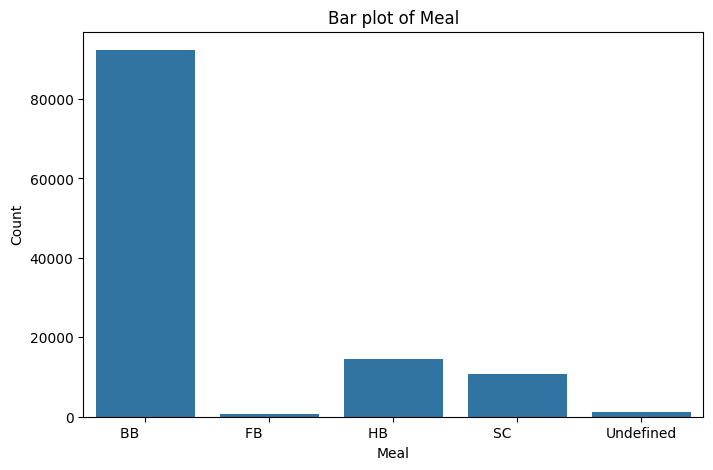

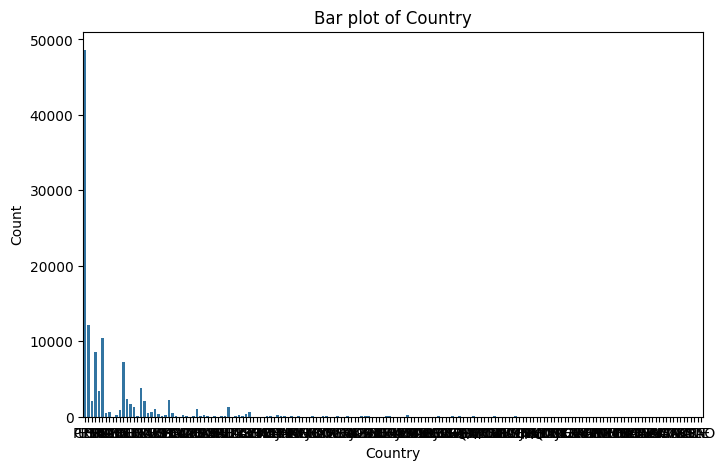

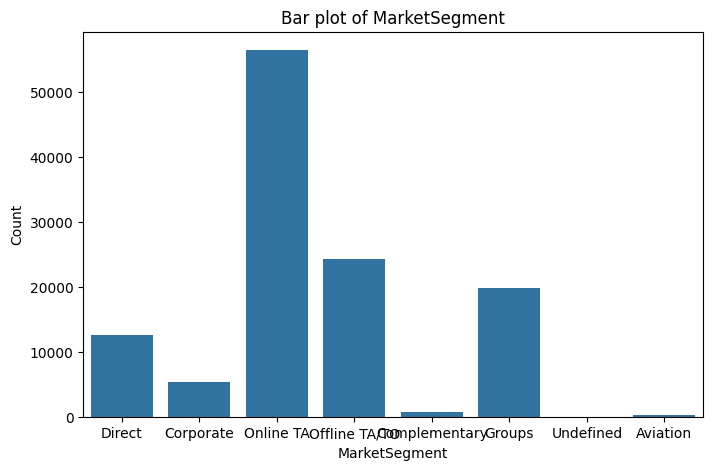

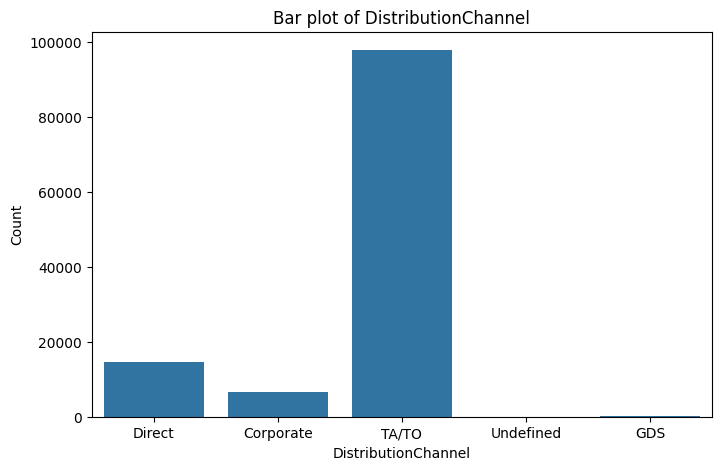

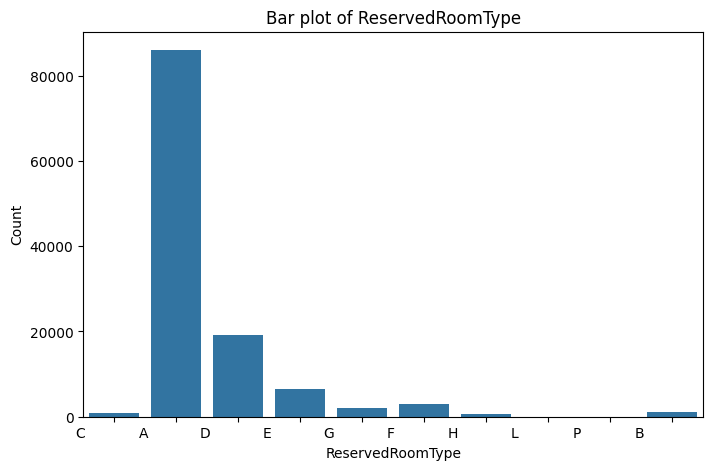

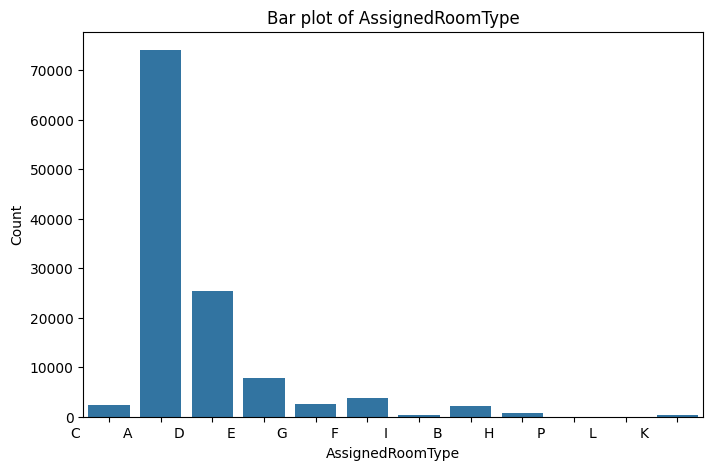

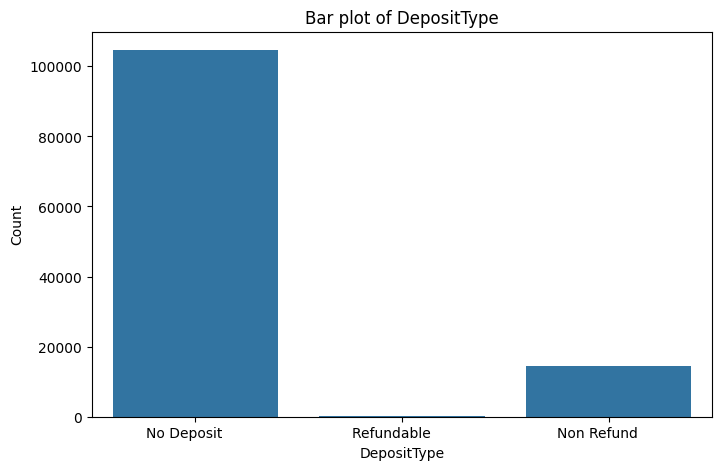

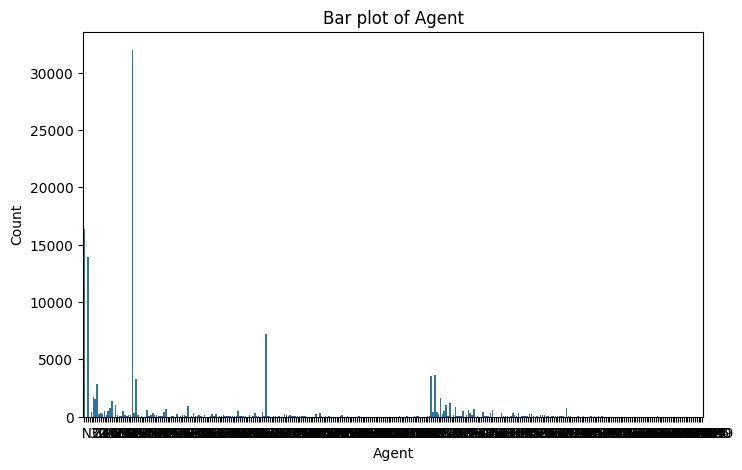

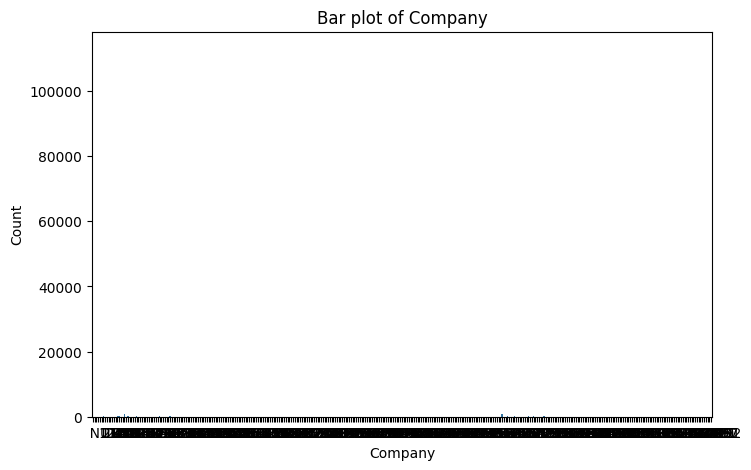

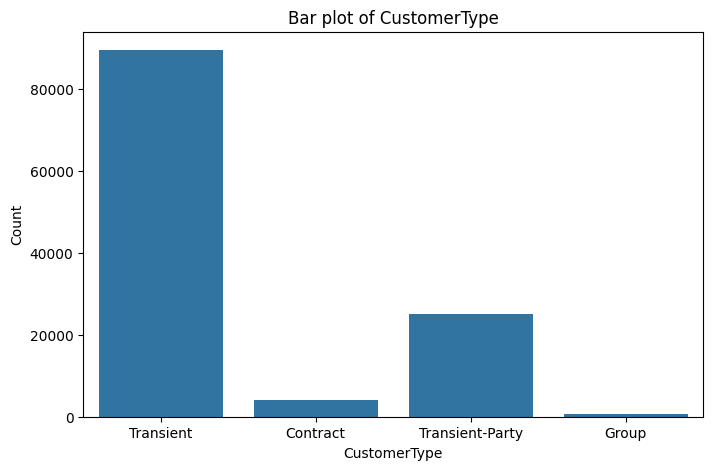

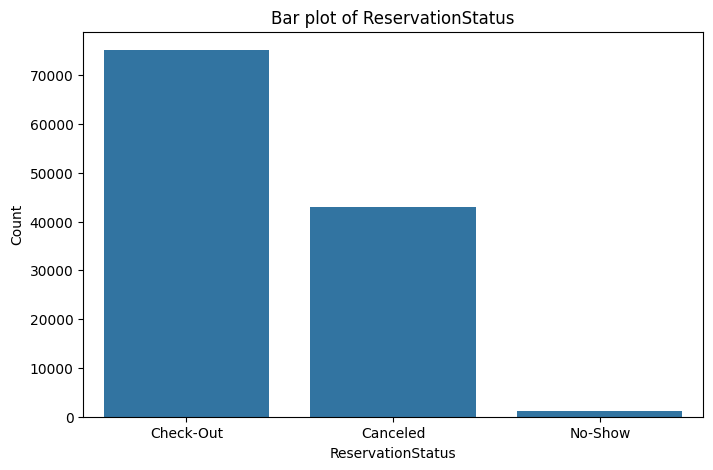

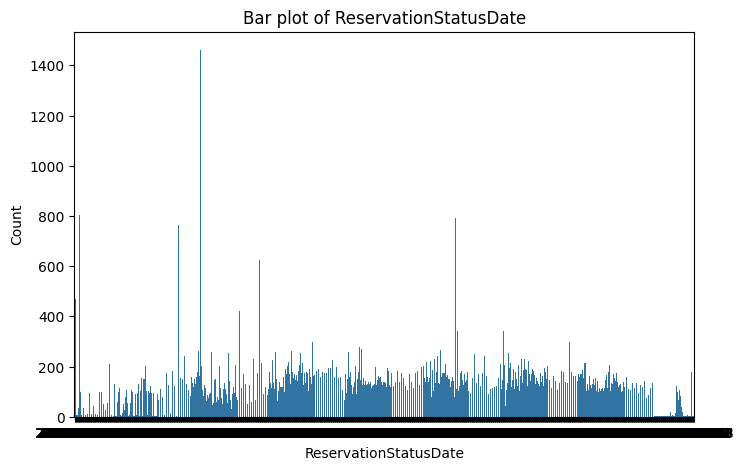

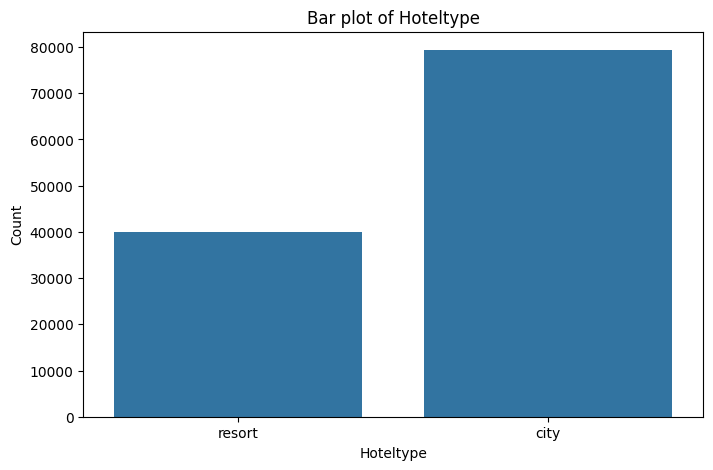

In [ ]:
# Plot bar plots for each categorical column
def plot_bar_plots(df):
    for col in df.select_dtypes(include='object').columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col)
        plt.title(f"Bar plot of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

plot_bar_plots(hotel_df)


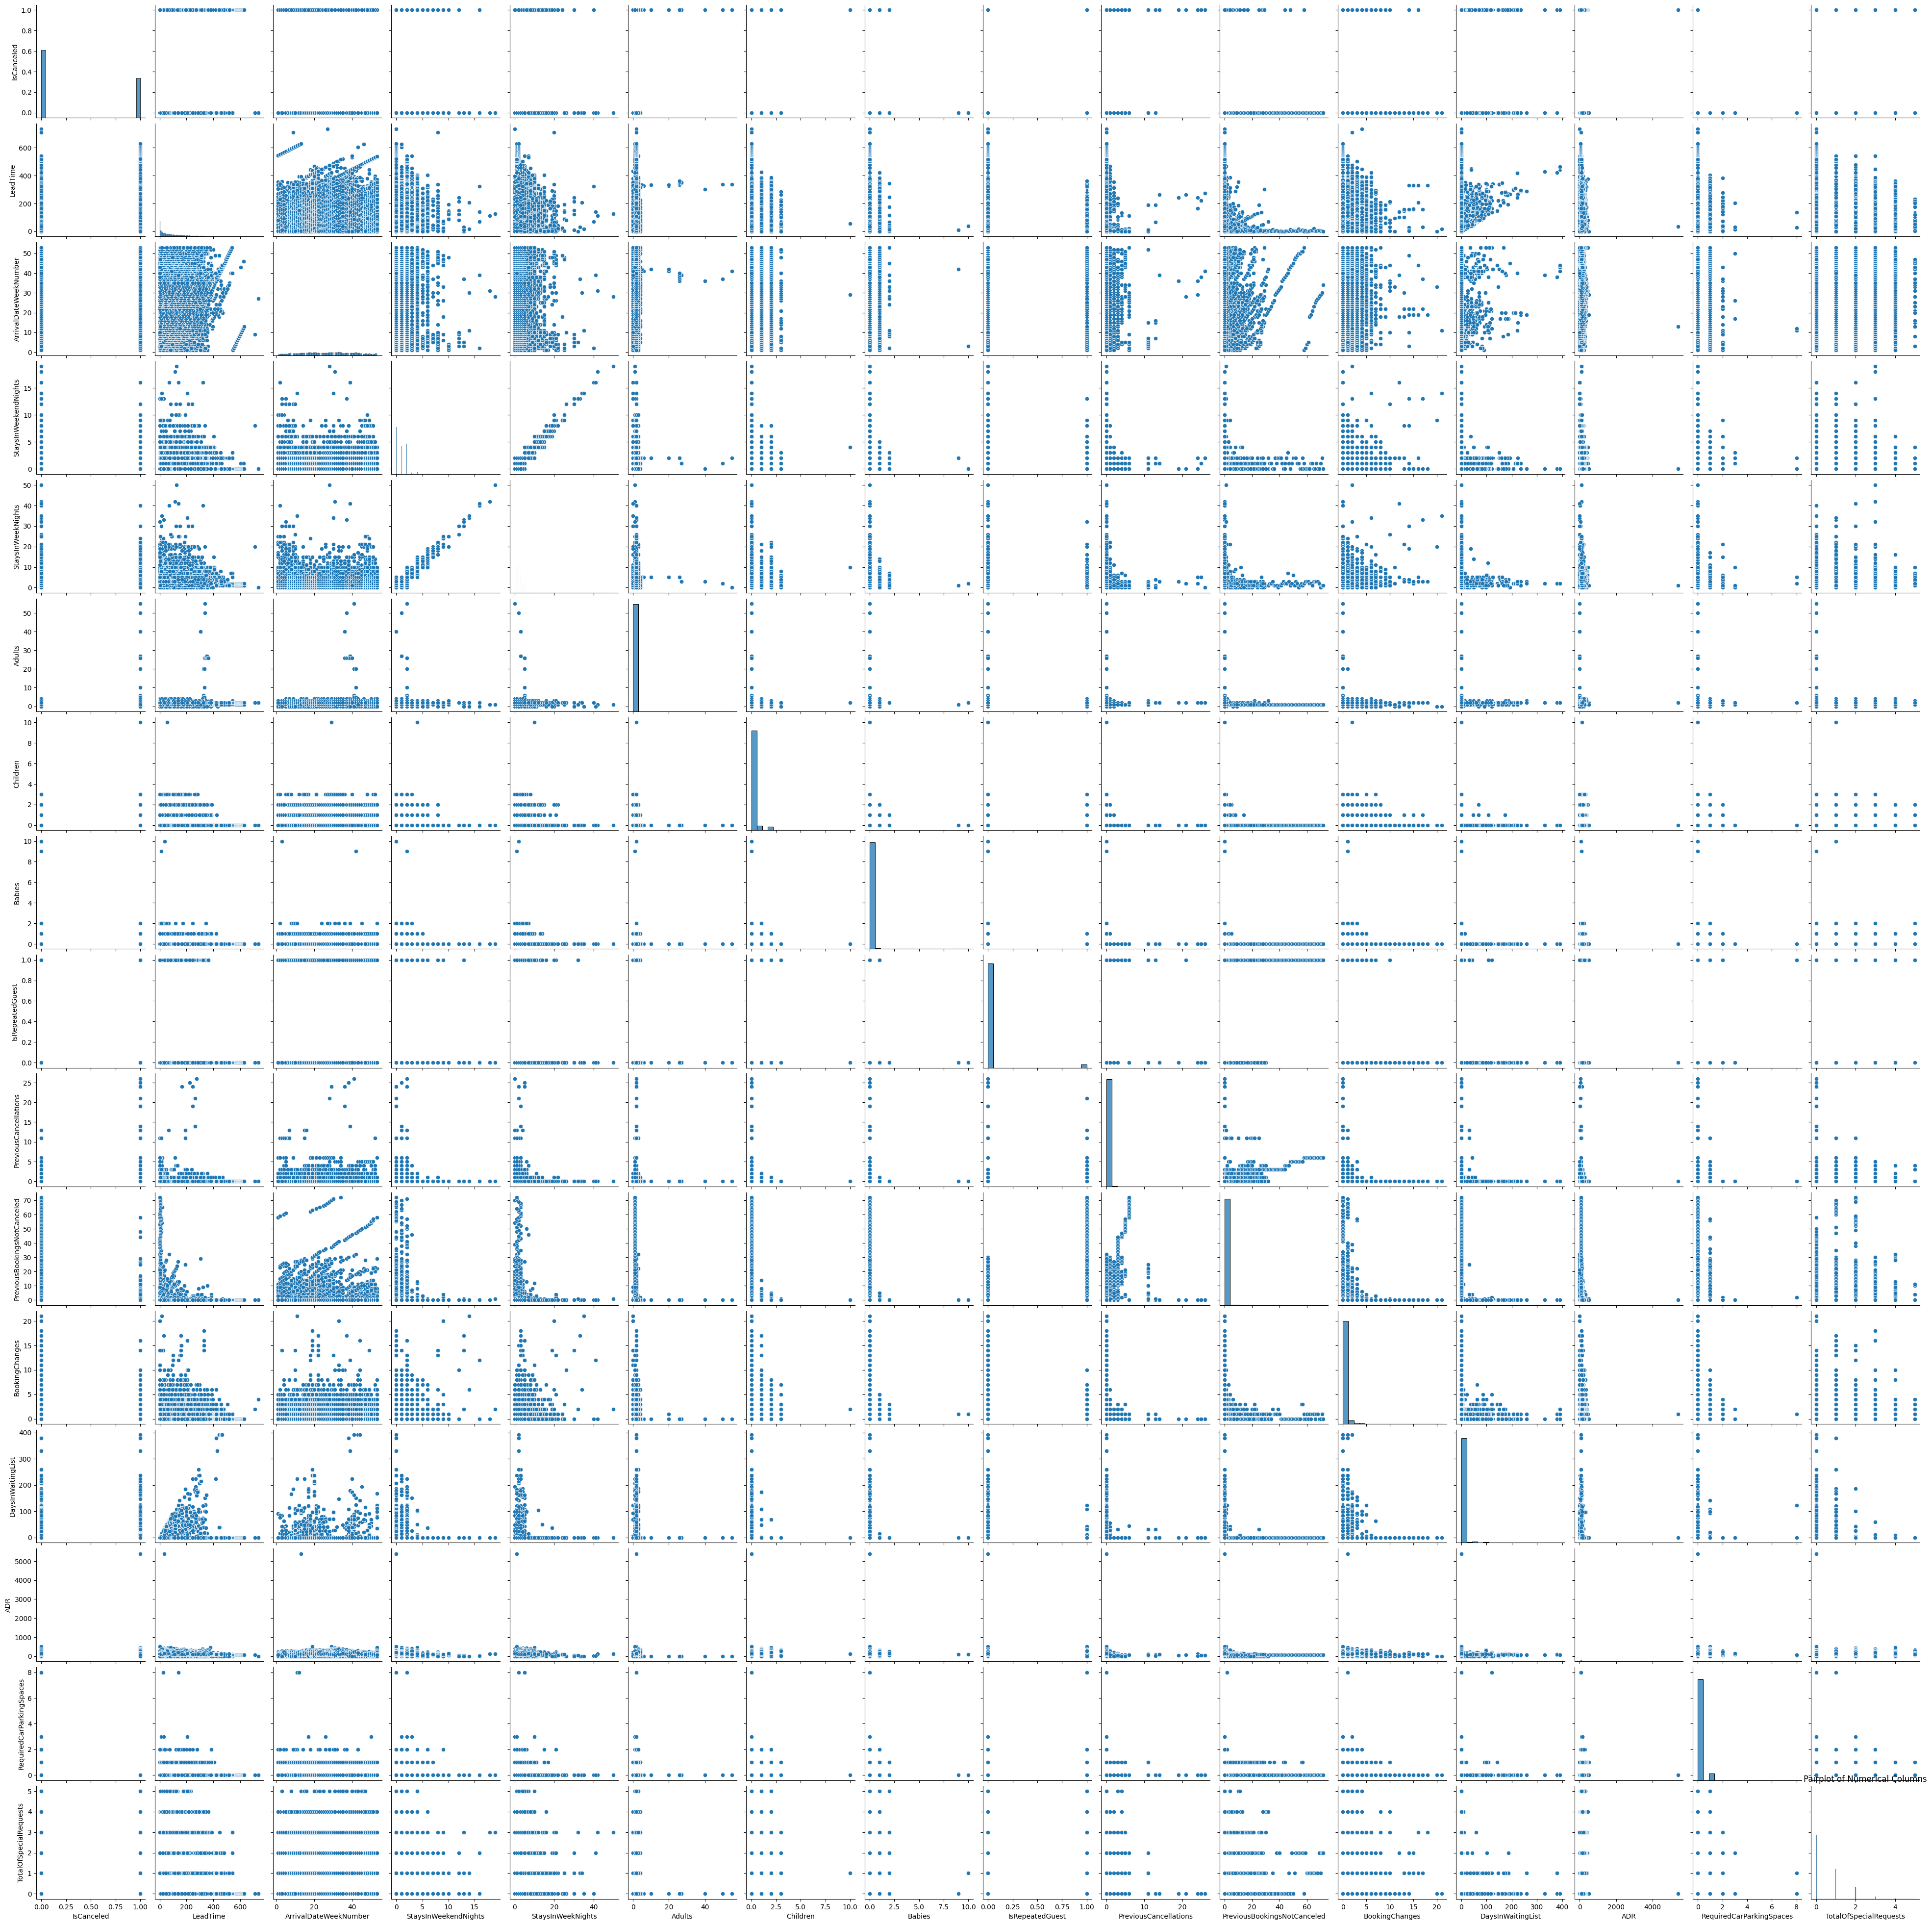

In [ ]:
# Plot pairplot for numerical columns
def plot_pairplot(df):
    sns.pairplot(df)
    plt.title("Pairplot of Numerical Columns")
    plt.show()

plot_pairplot(hotel_df)

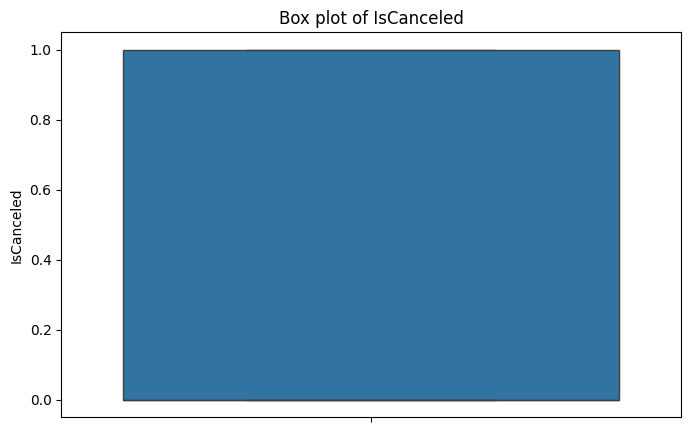

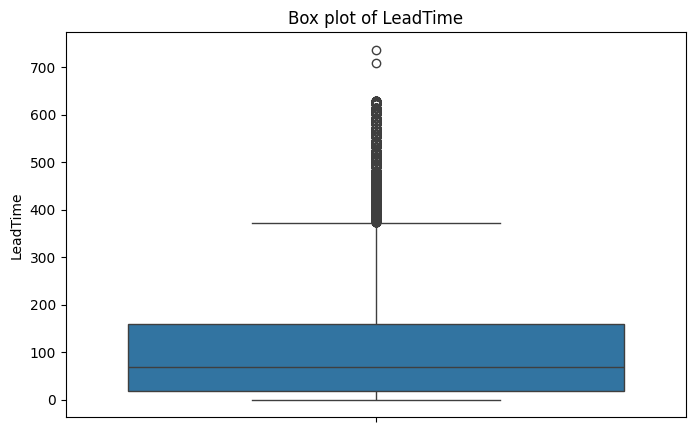

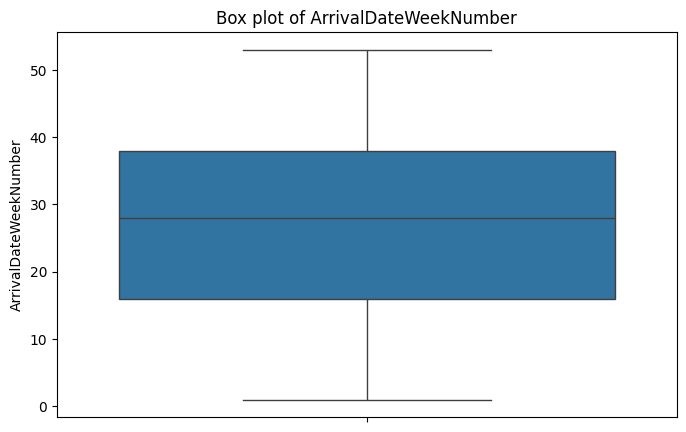

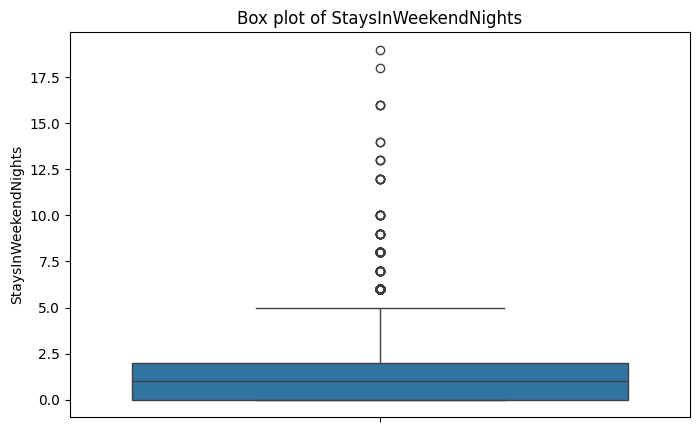

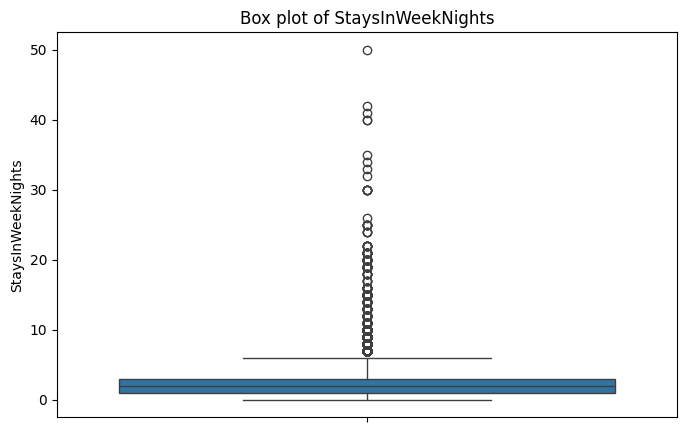

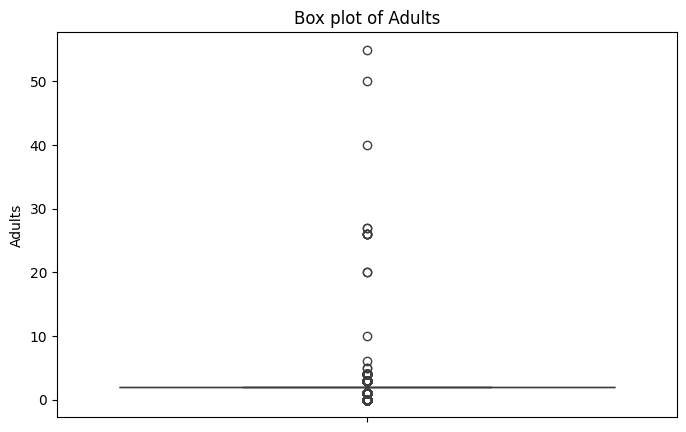

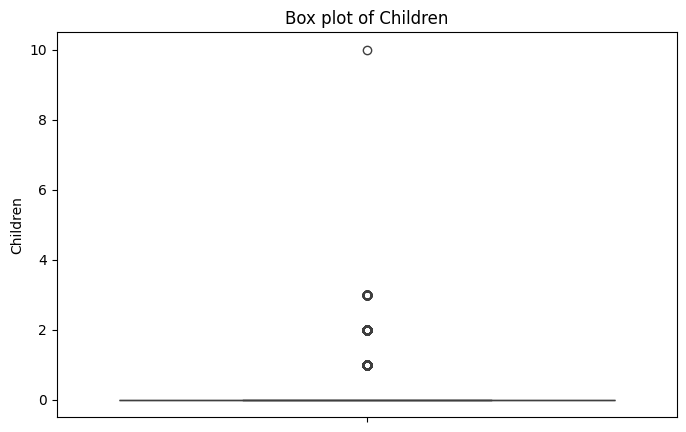

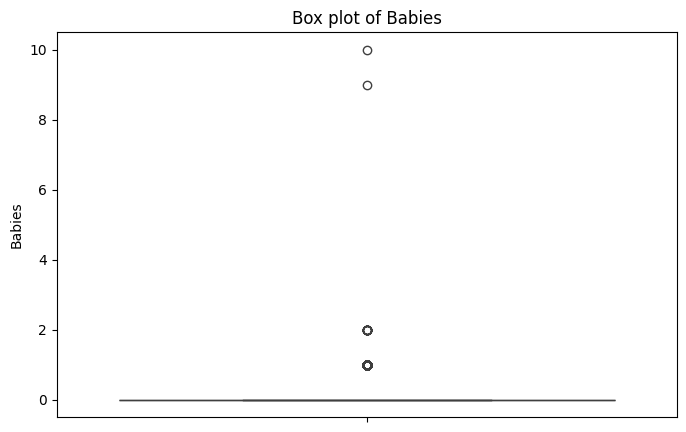

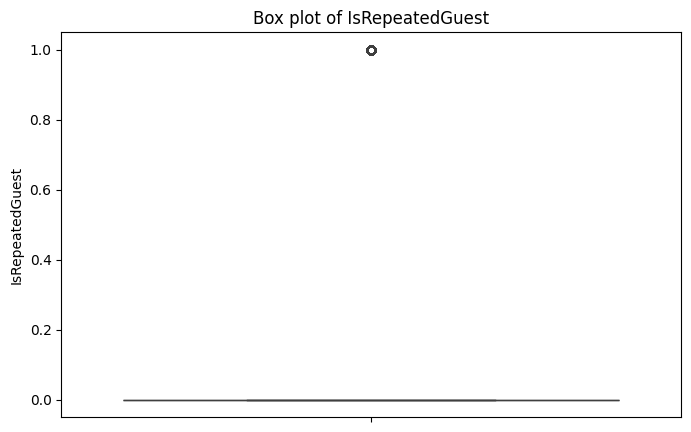

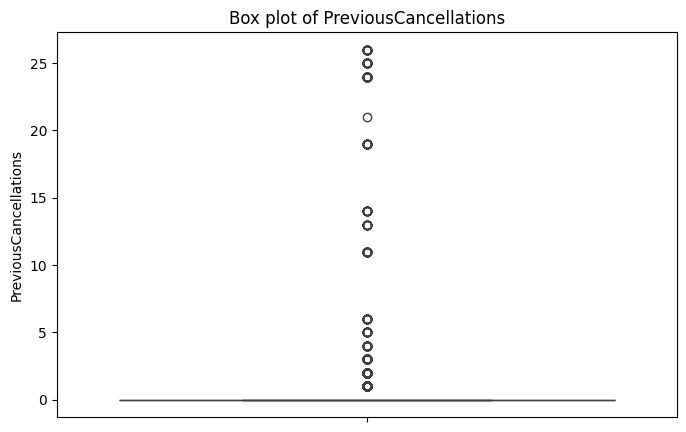

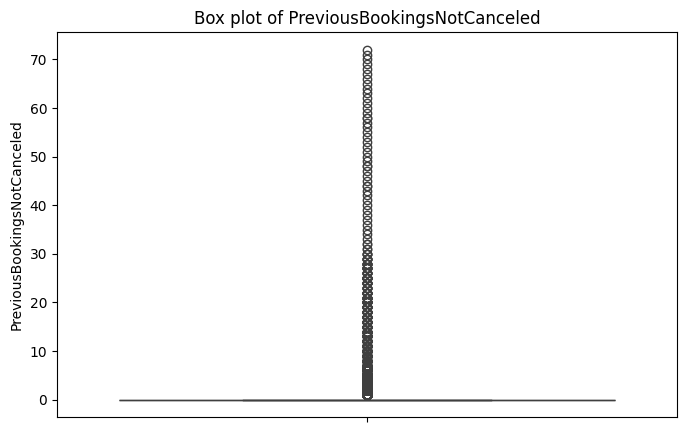

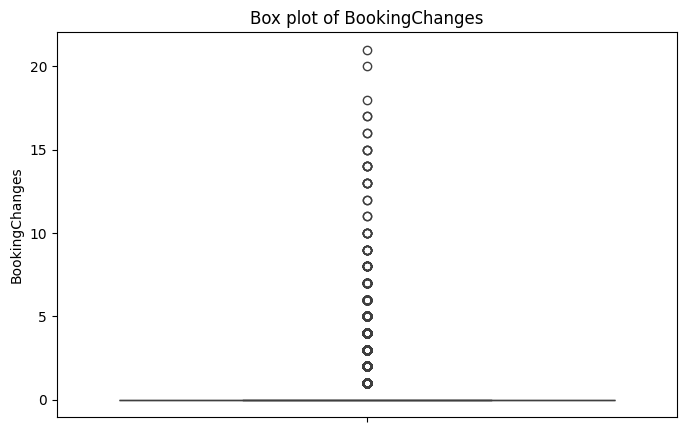

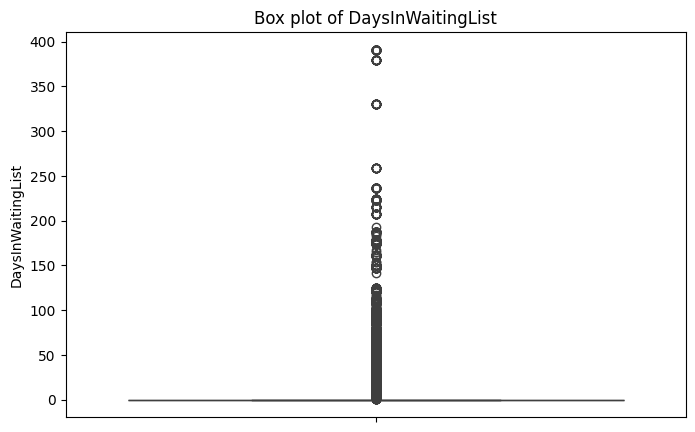

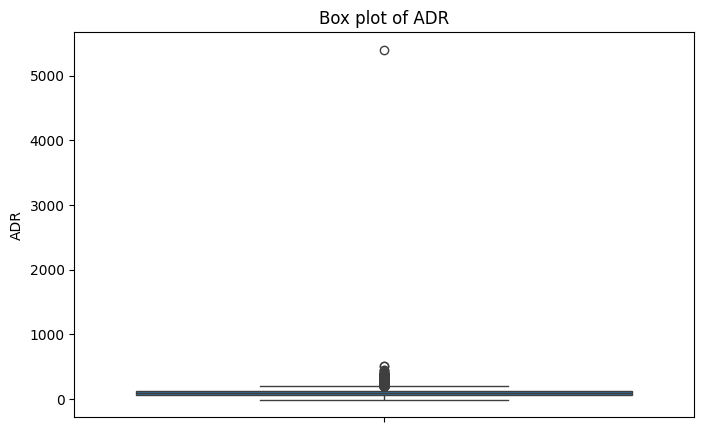

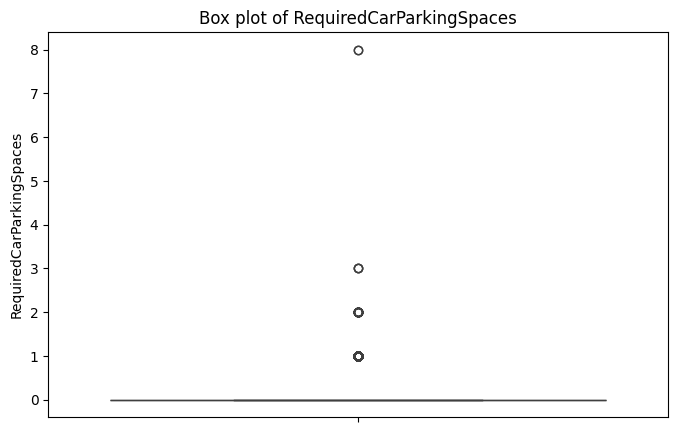

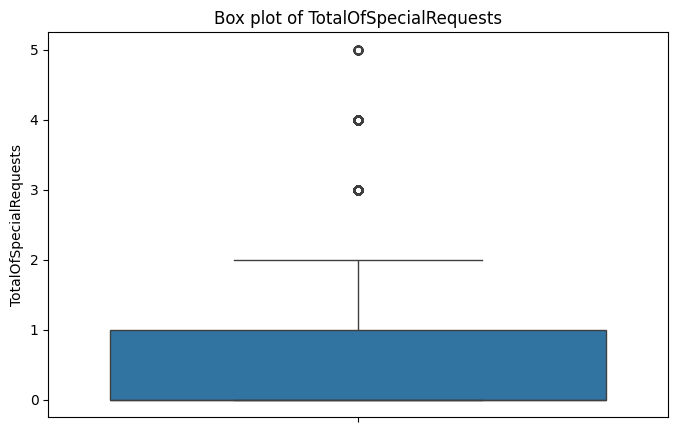

In [ ]:
# Plot boxplot for numerical columns
def plot_boxplot(df):
    for col in df.select_dtypes(include='number').columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, y=col)
        plt.title(f"Box plot of {col}")
        plt.ylabel(col)
        plt.show()

plot_boxplot(hotel_df)